# Clustering and Cluster Validation

# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

## Main Concept:
The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

To measure density of a region:
- __Density at a point P:__ Number of points within a circle of Radius Eps (ϵ) from point P.
- __Dense Region:__ For each point in the cluster, the circle with radius ϵ contains at least minimum number of points (MinPts).

The Epsilon neighborhood of a point P in the database D is defined as:

                            N (p) = {q ∈ D | dist(p, q) ≤ ϵ}

Following the definition of dense region, a point can be classified as a
1. __Core Point__ if |N (p)|≥ MinPts. The Core Points, as the name suggests, lie usually within the interior of a cluster. 
2. __Border Point__ has fewer than MinPts within its ϵ-neighborhood (N), but it lies in the neighborhood of another core point. 
3. __Noise__ is any data point that is neither core nor border point.

![image1.png](images/dbscan_points.png)


__Directly Density Reachable:__ Data-point a is directly density reachable from a point b if -
1. |N (b)|≥ MinPts; i.e. b is a core point.
2. a ∈ N(b) i.e. a is in the epsilon neighborhood of b.

Considering a border point and a core point, we can understand that notion of directly density reachable is not symmetric, because even though the core point falls in the epsilon neighborhood of border point, the border point doesn’t have enough MinPts, and thus fail to satisfy both conditions.

## Steps of DBSCAN Algorithm
1. The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter.
2. If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
3. If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
4. The above process continues until the density-connected cluster is completely found.
5. The process restarts with a new point which can be a part of a new cluster or labeled as noise.


### Libraries useful for DBSCAN

    To load dataset:    import pandas as pd
    Preprocessing:      from sklearn import preprocessing
    ploting graph:      import matplotlib.pyplot as plt
    numpy:              import numpy as np
    DBSCAN:             from sklearn.cluster import DBSCAN
    Agglomerative:      from sklearn.cluster import AgglomerativeClustering
    dendograms:         import scipy.cluster.hierarchy as shc
    for evaluations:    from sklearn import metrics
    plot the graph:     %matplotlib inline

In [1]:
#import libraries
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn import metrics

### Load the "s1_modified_labelled " data

In [2]:
#load the dataset
df = pd.read_csv("s1_modified_labelled.csv")
df.head()

,x,y,Class
0,844536,424646,0
1,870801,476330,0
2,878184,487392,0
3,846693,429031,0
4,777811,751059,0


### Q1. Perform pre-processing (if required)

In [3]:
# for s1_modified
df.isnull().sum()
X = df[df.columns[:-1]]
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

### Q2. Apply DBSCAN Algorithm using Scikit-Learn taking eps=0.3 and mininimum samples = 50

In [4]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN(eps=0.2)

### Q3. Plot the clusters.

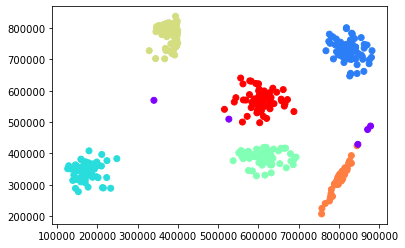

In [5]:
plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values, c=dbscan.labels_, cmap='rainbow')

# K-means Clustering

### Q4. Apply K-means with k=5

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random',n_clusters=6, random_state=None).fit(X_scaled)



In [7]:
kmeans.labels_

array([0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

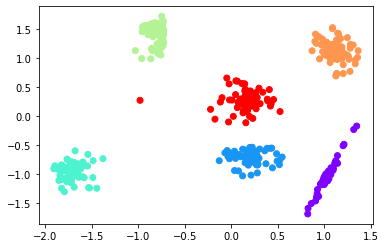

In [8]:
#Plot the clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='rainbow')

# Hierarchical Clustering

### Q5. Apply agglomerative clustering with single link and plot the clusters

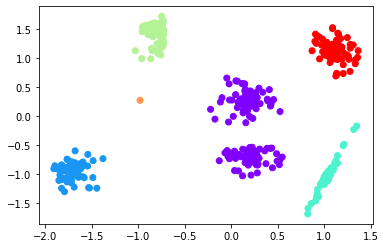

In [9]:
from sklearn.cluster import AgglomerativeClustering
agl = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single') 
agl.fit(X_scaled)
agl.labels_
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=agl.labels_, cmap='rainbow')

### Q6. Apply agglomerative clustering using wards method and plot their clusters

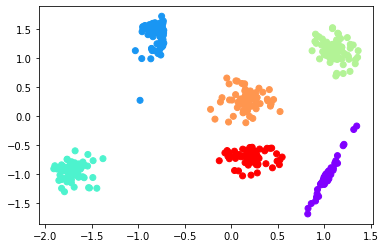

In [10]:
# wards method linkage
from sklearn.cluster import AgglomerativeClustering
aglw = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
aglw.fit(X_scaled)
aglw.labels_
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=aglw.labels_, cmap='rainbow')

### Q7. Apply agglomerative clustering using complete link and plot their clusters

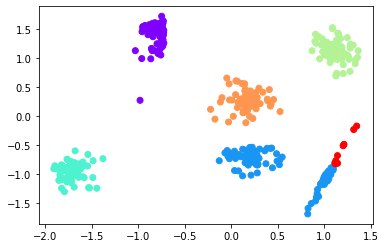

In [11]:
# complete linkage
from sklearn.cluster import AgglomerativeClustering
aglc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete') 
aglc.fit(X_scaled)
aglc.labels_
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=aglc.labels_, cmap='rainbow')

### Q8. Find the number of clusters in each case.

In [17]:
algo = [dbscan, kmeans, agl, aglw, aglc]
labels = ["dbscan", "kmeans", "Agglomerative Single","Agglomerative Ward","Agglomerative Complete"]
noOfClusters = [];
noisePoints = [];

for i in range(0,5):
    currentalgo = algo[i]
    print("****",labels[i],"****")
    noisePoints.append((currentalgo.labels_ == -1).sum())
    print("Number of noise points: ",noisePoints[i].sum())
    noc_algo = np.unique(currentalgo.labels_)
    if(noisePoints[i] > 0):
        noOfClusters.append(len(noc_algo) - 1)
    else:
        noOfClusters.append(len(noc_algo))
        
print(noOfClusters)  
print(noisePoints)

**** dbscan ****
Number of noise points:  5
**** kmeans ****
Number of noise points:  0
**** Agglomerative Single ****
Number of noise points:  0
**** Agglomerative Ward ****
Number of noise points:  0
**** Agglomerative Complete ****
Number of noise points:  0
[6, 6, 6, 6, 6]
[5, 0, 0, 0, 0]


In [15]:
algo=[dbscan, kmeans, agl, aglw, aglc]
noisePoints = []
noc = []
for i in range(len(algo)):
    currentalgo = algo[i]
    noisePoints.append((currentalgo.labels_==-1).sum())
    noc1 = np.unique(currentalgo.labels_)
    if(noisePoints[i] > 0):
        noc.append(len(noc1) - 1)
    else:
        noc.append(len(noc1))
print(noisePoints)
print(noc)


[5, 0, 0, 0, 0]
[6, 6, 6, 6, 6]


In [19]:
help(metrics.silhouette_samples)

Help on function silhouette_samples in module sklearn.metrics.cluster._unsupervised:

silhouette_samples(X, labels, *, metric='euclidean', **kwds)
    Compute the Silhouette Coefficient for each sample.
    
    The Silhouette Coefficient is a measure of how well samples are clustered
    with samples that are similar to themselves. Clustering models with a high
    Silhouette Coefficient are said to be dense, where samples in the same
    cluster are similar to each other, and well separated, where samples in
    different clusters are not very similar to each other.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.
    Note that Silhouette Coefficient is only defined if number of labels
    is 2 <= n_labels <= n_samples - 1.
    
    This function returns the Silhouette Coefficient for each sample

# Cluster Validation

### Q9. Calculate the silhouette score for each datapoint

In [16]:
from sklearn import metrics
dbscan_silhoutte_samples = metrics.silhouette_samples(X_scaled, dbscan.labels_, metric='euclidean')
#print("dbscan",dbscan_silhoutte_samples)
kmeans_silhoutte_samples = metrics.silhouette_samples(X_scaled, kmeans.labels_, metric='euclidean')
#print("kmeans",kmeans_silhoutte_samples)
agls_silhoutte_samples = metrics.silhouette_samples(X_scaled, agl.labels_, metric='euclidean')
#print("kmeans",agls_silhoutte_samples)
aglw_silhoutte_samples = metrics.silhouette_samples(X_scaled, aglw.labels_, metric='euclidean')
#print("kmeans",aglw_silhoutte_samples)
aglc_silhoutte_samples = metrics.silhouette_samples(X_scaled, aglc.labels_, metric='euclidean')
#print("kmeans",aglc_silhoutte_samples)

### Q10. Calculate the silhouette  score for each cluster in case of K-means, dbscan, single link, complete link and wards method

In [20]:
means_dbscan = [];
means_kmeans = [];
means_agls = [];
means_aglc = [];
means_aglw = [];

print("**** DBSCAN ****")
i = 0
for label in range(noOfClusters[0]):
    means_dbscan.append(dbscan_silhoutte_samples[dbscan.labels_ == label].mean())
    print("Cluster ",i,": ",means_dbscan[i])
    i = i + 1

i = 0
print("**** Kmeans ****")
for label in range(noOfClusters[1]):
    means_kmeans.append(kmeans_silhoutte_samples[kmeans.labels_ == label].mean())
    print("Cluster ",i,": ",means_kmeans[i])
    i = i + 1

i = 0
print("**** Agglomerative Single ****")
for label in range(noOfClusters[2]):
    means_agls.append(agls_silhoutte_samples[agl.labels_ == label].mean())
    print("Cluster ",i,": ",means_agls[i])
    i = i + 1

i = 0
print("**** Agglomerative Ward ****")
for label in range(noOfClusters[3]):
    means_aglw.append(aglw_silhoutte_samples[aglw.labels_ == label].mean())
    print("Cluster ",i,": ",means_aglw[i])
    i = i + 1

i = 0
print("**** Agglomerative Complete ****")
for label in range(noOfClusters[4]):
    means_aglc.append(aglc_silhoutte_samples[aglc.labels_ == label].mean())
    print("Cluster ",i,": ",means_aglc[i])
    i = i + 1




**** DBSCAN ****
Cluster  0 :  0.8050677606630225
Cluster  1 :  0.8937793795196722
Cluster  2 :  0.7488966811577216
Cluster  3 :  0.8563449084652952
Cluster  4 :  0.8008063104909865
Cluster  5 :  0.7418909551964109
**** Kmeans ****
Cluster  0 :  0.7596529748215892
Cluster  1 :  0.8937793795196722
Cluster  2 :  0.751324046409204
Cluster  3 :  0.855980764633404
Cluster  4 :  0.7133004522516861
Cluster  5 :  0.8077642913689619
**** Agglomerative Single ****
Cluster  0 :  0.3801123444352735
Cluster  1 :  0.8551263292198901
Cluster  2 :  0.8186523773689968
Cluster  3 :  0.8047368088801956
Cluster  4 :  0.0
Cluster  5 :  0.8491257969131135
**** Agglomerative Ward ****
Cluster  0 :  0.7596529748215892
Cluster  1 :  0.8379076219631338
Cluster  2 :  0.8937793795196722
Cluster  3 :  0.8059468874447834
Cluster  4 :  0.7339141800229522
Cluster  5 :  0.7507832858141817
**** Agglomerative Complete ****
Cluster  0 :  0.8379076219631338
Cluster  1 :  0.20414774754431816
Cluster  2 :  0.907915630856686

### Q11. Calculate the mean silhouette  score for all the clustering techniques mentioned in q10.

In [87]:
dbscan_ss = silhouette_score(X_scaled, dbscan.labels_, metric='euclidean')
print("DBSCAN: ",dbscan_ss)
kmeans_ss = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print("KMeans: ",kmeans_ss)
agls_ss = silhouette_score(X_scaled, agl.labels_, metric='euclidean')
print("Agglomerative Single: ",agls_ss)
aglc_ss = silhouette_score(X_scaled, aglc.labels_, metric='euclidean')
print("Agglomerative Complete: ",aglc_ss)
aglw_ss = silhouette_score(X_scaled, aglw.labels_, metric='euclidean')
print("Agglomerative Ward: ",aglw_ss)

DBSCAN:  0.7958342815672201
KMeans:  0.7962688065453963
Agglomerative Single:  0.6793805200274224
Agglomerative Complete:  0.6268020569816825
Agglomerative Ward:  0.7966116056591922


### Q12. Find the correlation between all the datapoints and plot a heat map for the same.

In [100]:
# take transpose of the dataframe
X2 = np.transpose(df[df.columns[:-1]])
print(X2)
corr_mat = X2.corr() 
print(corr_mat) 


      0       1       2       3       4       5       6       7       8    \
x  844536  870801  878184  846693  777811  823974  875160  828194  800913   
y  424646  476330  487392  429031  751059  725025  698897  742074  749332   

      9    ...     470     471     472     473     474     475     476  \
x  831165  ...  610330  598184  620438  600202  603021  515612  606548   
y  783383  ...  552628  531473  511694  622079  577991  540643  574376   

      477     478     479  
x  593490  607084  583728  
y  623110  595500  563146  

[2 rows x 480 columns]
     0    1    2    3    4    5    6    7    8    9    ...  470  471  472  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.

<AxesSubplot:>

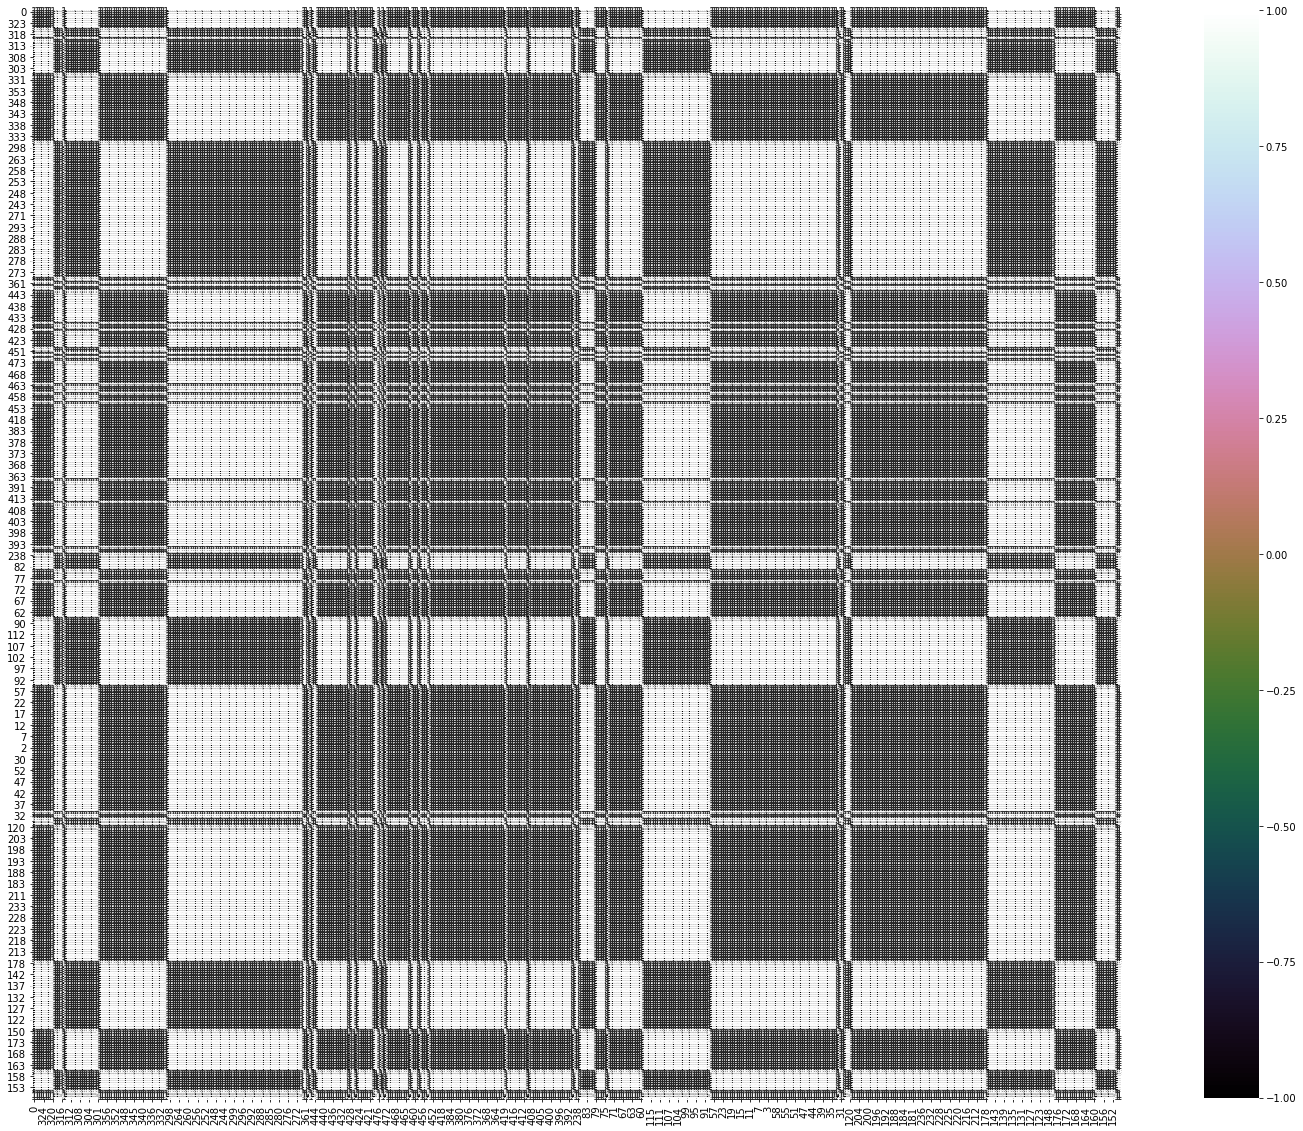

In [102]:
data = corr_mat.loc[:, corr_mat.min().sort_values().index]
data = data.loc[data.min(axis=1).sort_values().index, :]
data
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(data,vmax=1,square=True,annot=True,cmap='cubehelix')

### Q13. Create the cluster membership matrix for the dbscan, k-means and agglomerative clustering. Compare it with the heat map.

In [111]:
# dbscan
cmm_dbscan = np.zeros((480,480),dtype=int)
for i in range(len(dbscan.labels_)):
    for j in range(len(dbscan.labels_)):
        if dbscan.labels_[i] == dbscan.labels_[j]:
            cmm_dbscan[i][j] = 1
print(cmm_dbscan)            


[[1 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [115]:
# kmeans
cmm_kmeans = np.zeros((480,480),dtype=int)
for i in range(len(kmeans.labels_)):
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[i] == kmeans.labels_[j]:
            cmm_kmeans[i][j] = 1
print(cmm_kmeans)   

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [114]:
# single link
cmm_slink = np.zeros((480,480),dtype=int)
for i in range(len(agl.labels_)):
    for j in range(len(agl.labels_)):
        if agl.labels_[i] == agl.labels_[j]:
            cmm_slink[i][j] = 1
print(cmm_slink)   


[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


### Q14. Calculate the rand index for all the clustering techniques. Which method has the highest rand index for the dataset.

In [105]:
dbscan_RI = metrics.adjusted_rand_score(df['Class'], dbscan.labels_)
print(dbscan_RI)
kmeans_RI = metrics.adjusted_rand_score(df['Class'], kmeans.labels_)
print(kmeans_RI)
agls_RI = metrics.adjusted_rand_score(df['Class'], agl.labels_)
print(agls_RI)
aglw_RI = metrics.adjusted_rand_score(df['Class'], aglw.labels_)
print(aglw_RI)
aglc_RI = metrics.adjusted_rand_score(df['Class'], aglc.labels_)
print(aglc_RI)

0.9824274646429886
0.9752820336196293
0.8022147429363156
0.9803009740372722
0.809931679984334


### Q15. Plot the dendrograms for single link and wards method. Find the agglomerative level which gives the natural number of clusters

In [ ]:
# Plot the graph for inverse skee method
